Import potrzebnych bibliotek

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
np.random.seed(0)

In [3]:
n_pts = 500 # liczba punktów
X, y = datasets.make_circles(n_pts, random_state=123, noise=0.1, factor=0.2) # tworzenie naszego zbioru danych

`y` - **Labels**, opisuje czy dany punkt z zbioru X zanjduje się w części pozytywnej lub nie (0 lub 1) \
`X` - **zbiór danych**, opisuje nasze punkty x1,x2 w przestrzeni 2d


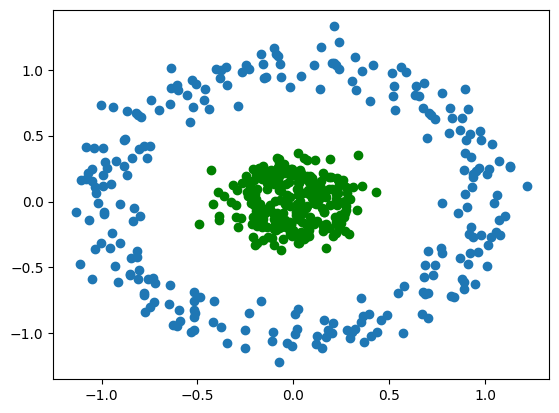

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1], color="green")


***
Tworzenie modelu
***

In [5]:

model = Sequential()
model.add(Dense(4,input_shape=(2,), activation='sigmoid')) # tworzymy predykcje z 4 neuronami o rozmiarze wejscia 2 i funkcji aktywacyjnej Sigmoid
model.add(Dense(1, activation='sigmoid')) # Tworzenie wyjscia pojedynczego z funkcja aktywacyjna sigmoid
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy']) # Tworzenie optimazera (do obliczania i zmniejszania bledu - accuracy - dopasowanie)


c:\Users\Konstanty\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
h = model.fit(x=X,y=y, verbose=1, batch_size=20, epochs=100,  shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 751us/step - loss: 0.7208 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 751us/step - loss: 0.6950 - accuracy: 0.5540
Epoch 3/100
25/25 [==============================] - 0s 744us/step - loss: 0.6945 - accuracy: 0.5460
Epoch 4/100
25/25 [==============================] - 0s 876us/step - loss: 0.6947 - accuracy: 0.5060
Epoch 5/100
25/25 [==============================] - 0s 709us/step - loss: 0.6943 - accuracy: 0.3340
Epoch 6/100
25/25 [==============================] - 0s 736us/step - loss: 0.6941 - accuracy: 0.5120
Epoch 7/100
25/25 [==============================] - 0s 792us/step - loss: 0.6935 - accuracy: 0.6860
Epoch 8/100
25/25 [==============================] - 0s 667us/step - loss: 0.6933 - accuracy: 0.3580
Epoch 9/100
25/25 [==============================] - 0s 751us/step - loss: 0.6949 - accuracy: 0.5300
Epoch 10/100
25/25 [==============================] - 0s 751us/step - loss: 0.6926 - accura

Text(0.5, 1.0, 'Accuracy')

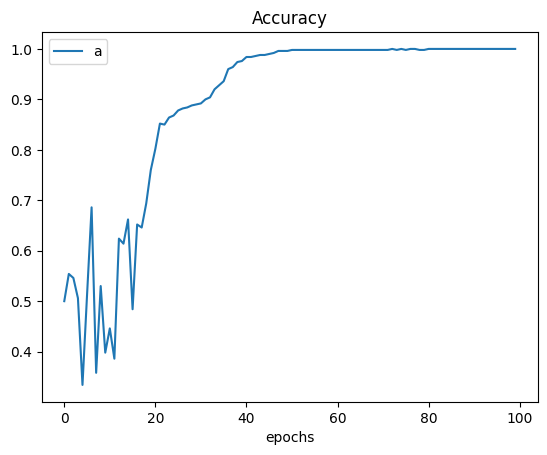

In [14]:
plt.plot(h.history['accuracy'])
plt.xlabel("epochs")
plt.legend('accuracy')
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

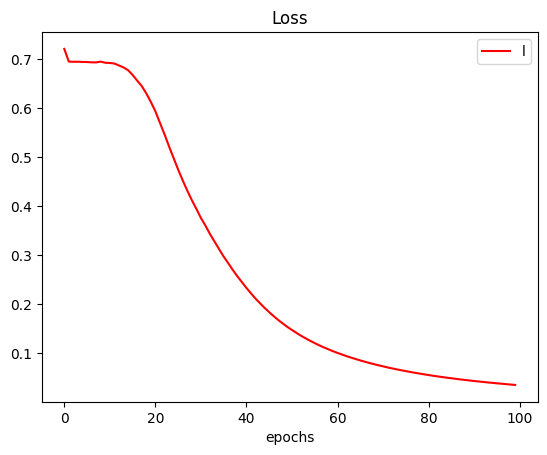

In [13]:
plt.plot(h.history['loss'], color="red")
plt.xlabel("epochs")
plt.legend('loss')
plt.title("Loss")

In [15]:
def plot_decision_boundary(X,y, model):
    x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25, 50)
    y_span = np.linspace(min(X[:,1])-0.25, max(X[:,1])+0.25, 50) #tworzenie przestrzeni naszego wykresu w OSI X i Y
    xx, yy = np.meshgrid(x_span, y_span) #tworzy macierz o rozmiarze wektora n , macierz nxn gdzie jedna kolumna badz wiersz maja takie same wartosci
    # print(xx,'\n',yy)
    xx_, yy_ = xx.ravel(), yy.ravel() # ravel robi z macierzy wektor jednowymiarowy
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 552us/step


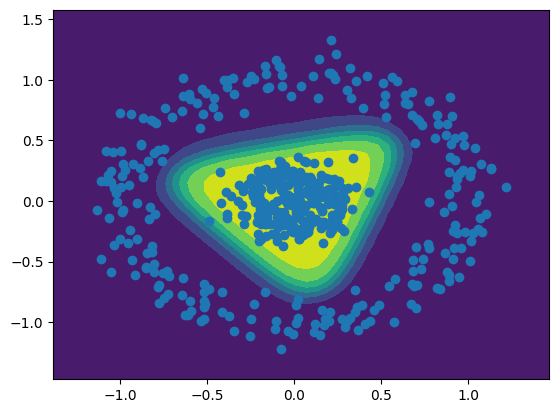

In [19]:
plot_decision_boundary(X,y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 15ms/step
prediction is:  [[0.9398938]]


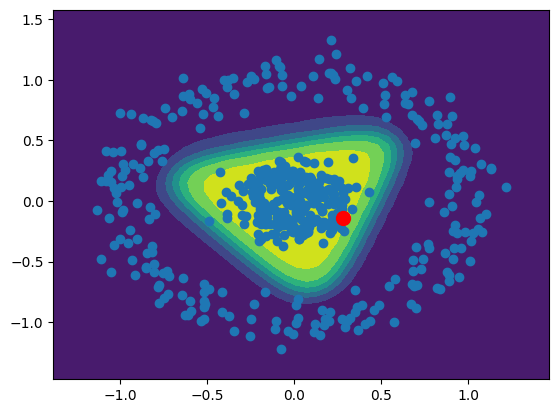

In [28]:
plot_decision_boundary(X,y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.28
y = -0.14
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="r")
print("prediction is: ", prediction)